# Membuat Peta Plot Titik Persebaran Gempa Berdasarkan Data Terbuka BMKG Menggunakan Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display,Latex
#Khusus Module Basemap pada windows yang saya gunakan memerlukan perlakuan tambahan
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

In [2]:
gempa = open('gempaterkini.txt')
Tanggal              = []
Jam_nilai            = []
Lintang_nilai        = []
Lintang_utara        = []
Lintang_selatan      = []
#Bujur dalam BT
Bujur_nilai          = []
#Magnitude SR
Magnitude_nilai      = []
#Kedalaman km
Kedalaman_nilai      = []
Wilayah_nilai        = []
Wilayah_arah         = []
Wilayah_lokasi       = []

for i in gempa:
    if '<Tanggal>' in i:
        Tanggal.append(i[11:-11])
    if '<Jam>' in i:
        Jam_nilai.append(i[7:-11])
    if '<Lintang>' in i:
        if 'LU' in i:
            Lintang_utara.append(float(i[11:-14]))
            Lintang_nilai.append(float(i[11:-14]))
        if 'LS' in i:
            Lintang_selatan.append(float(i[11:-14])*-1)
            Lintang_nilai.append(float(i[11:-14])*-1)
    if '<Bujur>' in i:
        Bujur_nilai.append(float(i[9:-12]))
    if '<Magnitude>' in i:
        Magnitude_nilai.append(float(i[13:-16]))
    if '<Kedalaman>' in i:
        Kedalaman_nilai.append(float(i[13:-16]))
    if '<Wilayah>' in i:
        for wilayah in i[11:-11].split():
            if wilayah == 'km':
                continue
            elif len(Wilayah_nilai)==len(Wilayah_arah) and len(Wilayah_nilai)==len(Wilayah_lokasi):
                Wilayah_nilai.append(wilayah)
            elif len(Wilayah_arah)<len(Wilayah_nilai) and len(Wilayah_arah)==len(Wilayah_lokasi):
                Wilayah_arah.append(wilayah)
            elif len(Wilayah_lokasi)<len(Wilayah_nilai) and len(Wilayah_lokasi)<len(Wilayah_arah):
                Wilayah_lokasi.append(wilayah)

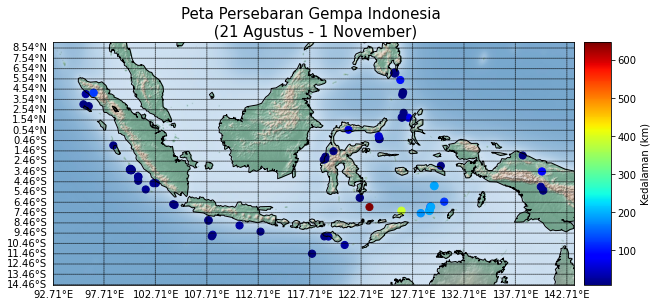

<IPython.core.display.Latex object>

In [3]:
#Menentukan Batas Gambar
Margin = 3
Lintang_utara_max   = float(max(Lintang_utara)) + Margin
Lintang_selatan_max = float(min(Lintang_selatan)) - Margin
Bujur_max           = float(max(Bujur_nilai)) + Margin
Bujur_min           = float(min(Bujur_nilai)) - Margin

#Plotting
fig=plt.figure(figsize=(10,9))
m = Basemap(resolution='l',
            llcrnrlat=Lintang_selatan_max,
            urcrnrlat=Lintang_utara_max,
            llcrnrlon=Bujur_min ,
            urcrnrlon=Bujur_max,projection='cyl')
m.drawcoastlines()
m.shadedrelief()
m.drawparallels(np.arange(Lintang_selatan_max,Lintang_utara_max,1), labels=[1,0,0,0])
m.drawmeridians(np.arange(Bujur_min,Bujur_max,5),labels=[0,0,0,1])
m.scatter(x=Bujur_nilai,y=Lintang_nilai,s=[i*10 for i in Magnitude_nilai], c=Kedalaman_nilai,cmap='jet')
c = m.colorbar(label='Kedalaman (km)')
plt.title('Peta Persebaran Gempa Indonesia \n (21 Agustus - 1 November)',fontsize=15)
plt.show()

display(Latex('Sumber data gempa diambil dari ${data.bmkg.go.id}$'))